In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline


import random
from random import randint

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/machinelearning_task/Fashion-data/

/content/drive/MyDrive/machinelearning_task/Fashion-data


In [53]:
ls

 fashion_data.ipynb  'fashion-mnist_test (1).csv'   fashion-mnist_train.csv


Read the train and test csv file

In [54]:
fd2=pd.read_csv("fashion-mnist_test (1).csv")
fd1=pd.read_csv("fashion-mnist_train.csv")

In [55]:
print(fd1.shape,fd2.shape)

(60000, 785) (10000, 785)


In [56]:
fd1.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
fd1.tail(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
fd1.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,32.830583,45.731017,52.064083,50.80245,50.459150,53.796217,51.396233,40.432733,26.083333,10.420583,4.079750,1.938183,1.177650,0.857983,0.461133,0.244300,0.092667,0.018333,0.006400,0.020617,0.098967,0.357200,0.767217,2.104583,7.331483,17.472317,32.009017,52.814583,79.349917,...,92.470233,90.523350,79.255767,62.576500,45.753283,43.970183,47.772400,38.841583,22.306933,9.280517,3.955417,0.631000,0.024633,0.218117,1.027250,4.352033,12.568183,20.847967,21.076467,17.152267,22.114933,30.559350,41.743617,51.506583,52.60855,46.479783,42.612733,45.309733,50.162100,46.438617,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,57.633860,65.964300,68.603587,67.86885,67.370188,69.467796,67.912739,62.639596,51.818389,32.591095,20.118496,13.953210,10.718718,9.256114,6.768024,4.953103,2.850576,1.232175,0.548966,1.184869,2.912779,6.523878,9.702476,15.977721,30.056073,47.953585,65.625544,82.122567,95.340204,...,100.912013,99.731484,95.172029,88.844198,78.434831,76.970849,83.212136,74.477031,55.983447,37.937984,24.953295,8.146274,0.968474,4.444904,10.030021,20.912278,36.920905,48.909477,48.263137,42.173000,48.241135,54.902062,61.963606,68.331468,69.76041,67.476669,66.267004,66.737520,68.705817,65.944847,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2

In [59]:
fd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [60]:
fd1.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

#label column

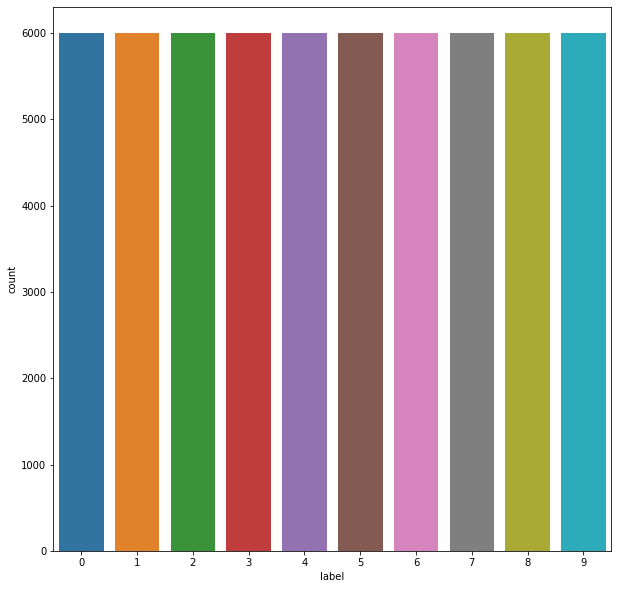

In [93]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(fd1['label'])
plt.show()

PCA

 Principal Component Analysis for data visualization(PCA)
-PCA is an unsupervised learning algorithm which finds the relations among features within a dataset. It is also widely used as a preprocessing step for supervised learning algorithms.

In [63]:
x=fd1.drop("label",axis=1, inplace=False )#inplace=False is used, it performs operation on data and returns a new copy of data.
y=fd1['label']

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(x)

principal_DF = pd.DataFrame(data = principal_components, columns = ['component1','component2'])

final_DF = pd.concat( [principal_DF, fd1[['label']]], axis = 1)

#  Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

Visualize 2D Projection

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


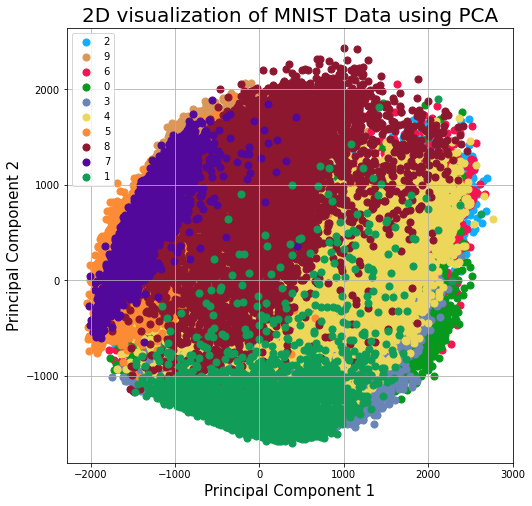

In [66]:
ffig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(fd1['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)


for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()



#fisrt 10 images and their labels

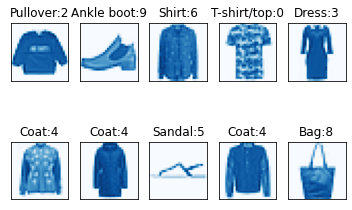

In [70]:
##Creating a list of the classes of th target: 
images_labels=['T-shirt/top', 'Trouser','Pullover','Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
#Reshape the rows then present the first 10 images: 
for i in range(10):
    first_image = x.values[i].reshape(28,28)
    first_label = y.values[i]
    
    #Extract the classes from the list that we have created
    title =images_labels [first_label]   
    
    plt.subplot(2,5,i+1)              #Create subplots
    plt.imshow(first_image, cmap='Blues')
    plt.xticks([]), plt.yticks([])   
     #Hide the ticks
    ttitle = str(title  ) +':'  + str(first_label) 
    plt.title(ttitle)    

Splitting train and test 


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(48000, 784) (12000, 784) (48000,) (12000,)


 Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy))


Accuracy of logistic regression classifier on test set: 0.85


In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 994   10   25   55    7    0  128    0   12    1]
 [   4 1123    6   34    4    0    3    0    0    0]
 [  13    3  924   12  140    0   95    0   13    0]
 [  36   18   15 1084   59    0   29    0    1    0]
 [   2    1  105   42  919    0  112    0    4    0]
 [   0    1    1    0    0 1031    0   56   12   40]
 [ 168    5  149   37  145    0  716    0   22    1]
 [   0    0    0    0    0   38    0 1150    3   33]
 [   4    1    6    7    5   11   18    5 1092    0]
 [   1    0    0    0    0   16    0   40    1 1152]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1232
           1       0.97      0.96      0.96      1174
           2       0.75      0.77      0.76      1200
           3       0.85      0.87      0.86      1242
           4       0.72      0.78      0.75      1185
           5       0.94      0.90      0.92      1141
           6       0.65      0.58      0.61      1243
           7       0.92      0.94      0.93      1224
           8       0.94      0.95      0.95      1149
           9       0.94      0.95      0.95      1210

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

